In [182]:
import papermill as pm
from datetime import datetime, timedelta
import os
import scrapbook as sb
import pandas as pd

In [183]:
base_output_folder = os.path.expanduser('outputs')

if not os.path.exists(base_output_folder):
        os.makedirs(base_output_folder)

In [184]:
def last_dow(d: datetime, dow: int) -> datetime:
    '''
    Gets the date of the last day of week, using datetime convention of Monday is 0 and Sunday is 6
    '''
    dow_d = d.weekday()
    days_delta = (7 - dow) + dow_d if dow_d < dow else dow_d - dow
    return d - timedelta(days=days_delta)

In [185]:
run_dates = [(last_dow(datetime(2021, 11, 5), 4) + timedelta(days=7 * x)) for x in range(1)]
tokens = ['BTC', 'ETH', 'AVAX']

In [186]:
for run_date in run_dates:
    for token in tokens:
        print(f'running for {token} for date {run_date} to {run_date + timedelta(days=14)}', end='\r')
        res = pm.execute_notebook(
            'template.ipynb',
            f'{base_output_folder}/market_analysis_{token}_{str(run_date)[:10]}.ipynb',
            parameters = {
                'from_date': f'{run_date}',
                'to_date': f'{run_date + timedelta(days=14)}',
                'chosen_token': token,
            }
        )

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

Executing:   0%|          | 0/8 [00:00<?, ?cell/s]

In [187]:
nb = sb.read_notebook('outputs/market_analysis_AVAX_2021-11-05.ipynb')

In [188]:
nb.scraps['prices'].data

,open,high,low,close,volume,volumeUSD,token,chain,hourly_returns(%),volatility
ts,,,,,,,,,,
2021-11-05 00:00:00,79.01,80.00,78.14,79.60,34424.318,2.727792e+06,AVAX,AVAX,0.746741,NaN
2021-11-05 01:00:00,79.53,82.00,78.17,78.42,87685.697,7.091379e+06,AVAX,AVAX,-1.395700,NaN
2021-11-05 02:00:00,78.42,79.34,78.00,78.79,25176.218,1.978428e+06,AVAX,AVAX,0.471818,NaN
2021-11-05 03:00:00,78.79,79.10,78.02,78.82,19701.276,1.547977e+06,AVAX,AVAX,0.038076,NaN
2021-11-05 04:00:00,78.83,79.10,78.10,78.22,22259.034,1.747266e+06,AVAX,AVAX,-0.773817,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-18 20:00:00,100.39,101.76,99.96,100.31,42433.231,4.275812e+06,AVAX,AVAX,-0.079689,0.456847
2021-11-18 21:00:00,100.32,103.71,99.08,103.44,67615.264,6.869729e+06,AVAX,AVAX,3.110048,0.463176
2021-11-18 22:00:00,103.48,105.18,99.85,100.22,84317.558,8.631859e+06,AVAX,AVAX,-3.150367,0.485750


In [189]:
nbs = sb.read_notebooks('outputs')

In [190]:
pd.DataFrame([
    pd.Series({
        'token': scrap['token'].data,
        'from_date': scrap['from_date'].data,
        'to_date': scrap['to_date'].data,
        'volatility': scrap['prices'].data.volatility.mean()}) 
    for book, scrap in nbs.notebook_scraps.items()
])

,token,from_date,to_date,volatility
0,AVAX,2021-11-05 00:00:00,2021-11-19 00:00:00,0.271213
1,BTC,2021-11-05 00:00:00,2021-11-19 00:00:00,0.104464
2,ETH,2021-11-05 00:00:00,2021-11-19 00:00:00,0.116946


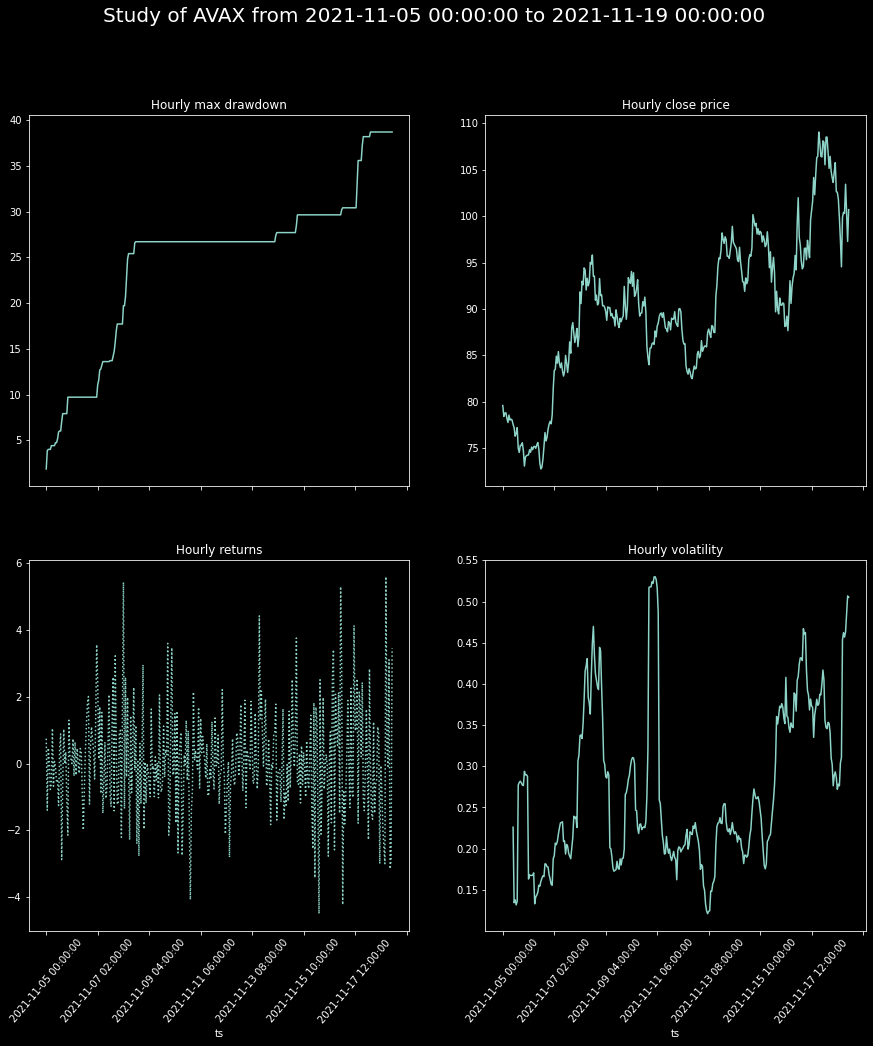

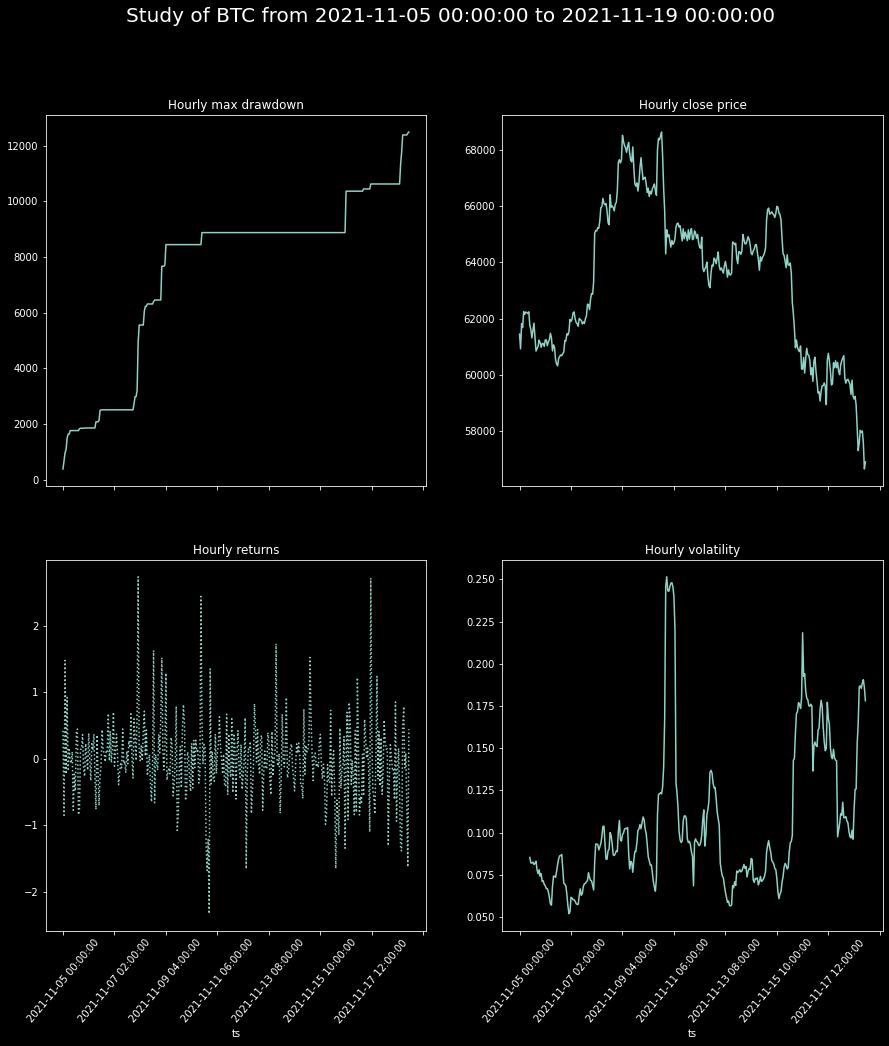

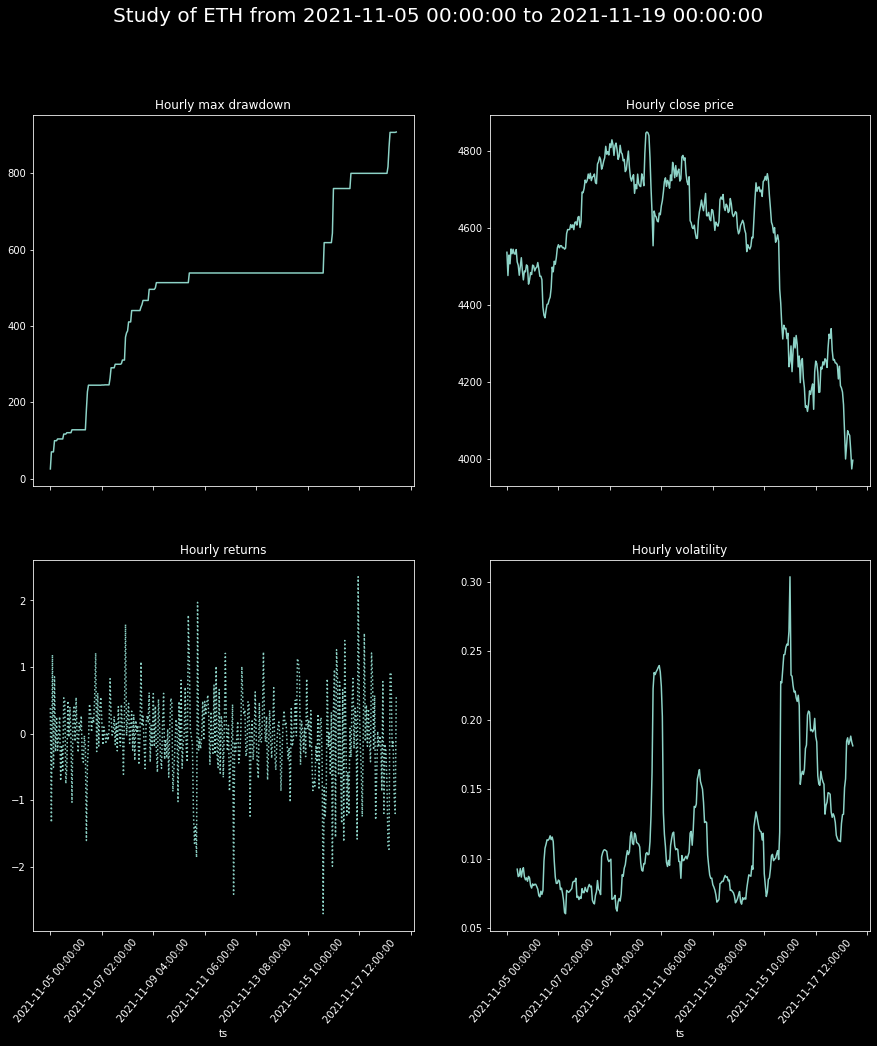

[None, None, None]

In [191]:
[nbs[nb_name].reglue('summary_plot') for nb_name in nbs]